# Matplotlib bar chart storytelling

In [9]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv("../../video_lecture/02_matplotlib_barline/data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [25]:
df_qunatity_brand = duckdb.query("""--sql
    SELECT make as Brand, 
             SUM(Quantity) as Quantity
             FROM df
             GROUP BY brand 
             ORDER BY Quantity DESC
""").df().set_index("Brand")

df_qunatity_brand

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
...,...
Westfield,1.0
Koenigsegg,1.0
Martin Motors,1.0


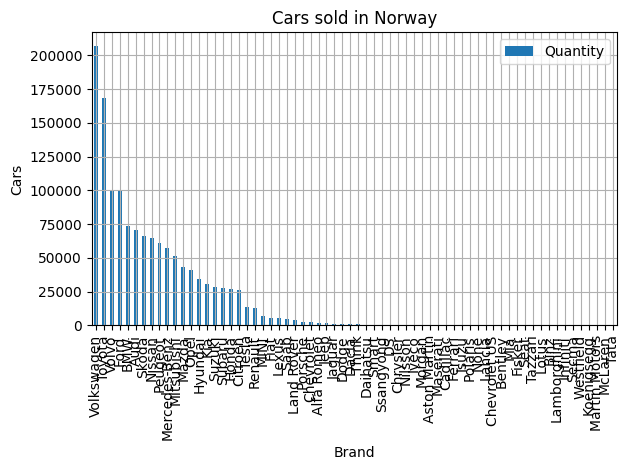

In [26]:
#axis instance
ax = df_qunatity_brand.plot(kind="bar", title="Cars sold in Norway", ylabel="Cars")
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/bar_initial")

In [ ]:
df_qunatity_brand.iloc[:10]

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0
Audi,70475.0
Skoda,66007.0
Nissan,64535.0
Peugeot,61033.0


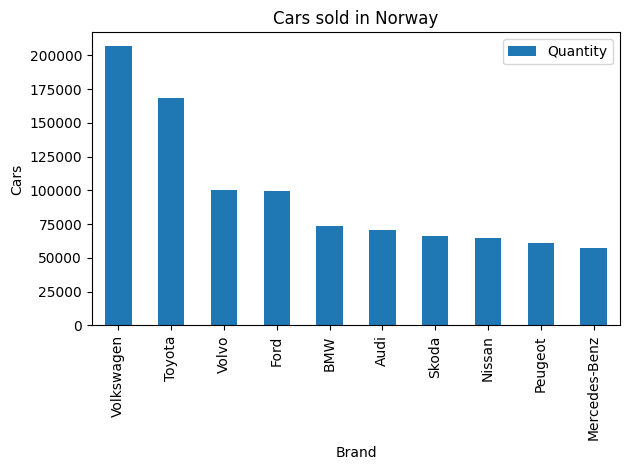

In [29]:
#copy code from above to get only top 10
ax = df_qunatity_brand.iloc[:10].plot(kind="bar", title="Cars sold in Norway", ylabel="Cars")
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/bar_top10")

## Apply data storytelling
- remove clutter
- add contrast
- colors sparingly
- descriptive title and labels
- positioning titles and lables
- proximity principles with annotations
- percentage instead of absolute values
- horizontal bar

In [33]:
# percentage
df_percentage = df_qunatity_brand["Quantity"] / df_qunatity_brand["Quantity"].sum() * 100
df_percentage

Brand
Volkswagen       15.340063
Toyota           12.482984
Volvo             7.417851
Ford              7.401225
BMW               5.441826
                   ...    
Westfield         0.000074
Koenigsegg        0.000074
Martin Motors     0.000074
McLaren           0.000074
Tata              0.000074
Name: Quantity, Length: 66, dtype: float64

In [63]:
df_percentage_top10 = df_percentage.iloc[:10]
colors = [GRAY_1]*len(df_percentage_top10)
colors[2] = BLUE_1
colors

['#CCCCCC',
 '#CCCCCC',
 '#1E4E5C',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC',
 '#CCCCCC']

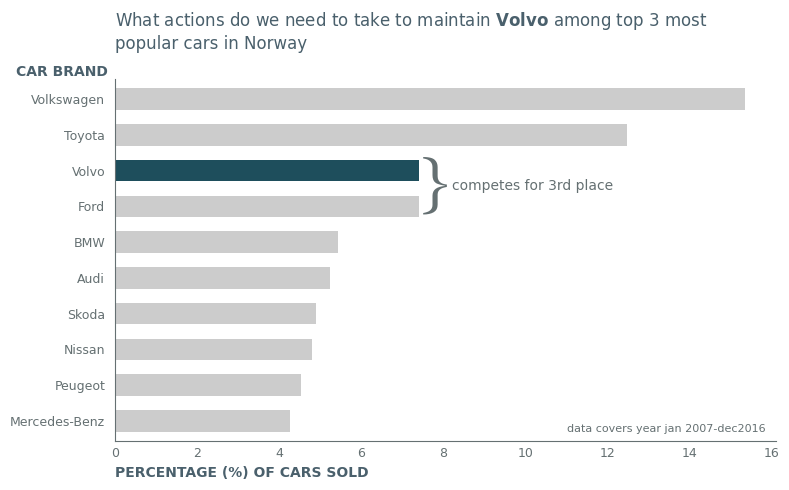

In [125]:
#copy code from above to get only top 10
#horizontal bar chart
ax = df_percentage_top10.plot(
    kind="barh", 
    ylabel="Cars", 
    figsize = (8,5), 
    width=0.6,
    color= colors #adding colors
    )

ax.invert_yaxis()

#remove clutter
ax.spines[["top", "right"]].set_visible(False)

#contrast
ax.spines[["left", "bottom"]].set_color(GRAY_2)
ax.tick_params(axis="both", colors= GRAY_2, labelsize=9, length=0, pad=5)
ax.tick_params(axis="y", pad = 7)

#descriptive tiles and labels
ax.set_title("What actions do we need to take to maintain " 
             + r"$\bf{Volvo}$" #LaTeX mode
             + " among top 3 most\npopular cars in Norway", 
             loc="left",
             color= GRAY_3,
             pad= 22)

ax.set_xlabel("PERCENTAGE (%) OF CARS SOLD", color= GRAY_3, fontweight="bold", loc="left")
ax.set_ylabel("CAR BRAND", color= GRAY_3, fontweight="bold", loc="top", rotation=0)
ax.yaxis.set_label_coords(-0.01,1)

#annotations - proximity principles
ax.annotate(xy= (7.4,2.9), text = "}", fontsize= 48, color = GRAY_2, family="Times")
ax.annotate(xy= (8.2,2.55), text = "competes for 3rd place", color = GRAY_2)
ax.annotate(xy= (11,9.3), text = "data covers year jan 2007-dec2016", fontsize=8, color = GRAY_2)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/bar_percentage", dpi=400)